Trimmin Zero voice


In [ ]:
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence
from scipy.io.wavfile import write
import numpy as np

# --- Configuration ---
# NOTE: This assumes your long audio file is already on your local machine (Pop!_OS)
INPUT_AUDIO_PATH = os.path.expanduser('/content/drive/MyDrive/Dataset 3.0/bearfull.wav')
OUTPUT_AUDIO_PATH = os.path.expanduser('/content/drive/MyDrive/Dataset 3.0/bearfull(mod).wav')
os.makedirs(os.path.dirname(OUTPUT_AUDIO_PATH), exist_ok=True)


# --- Silence Detection Parameters ---
# The threshold (in dBFS) below which to consider silence.
# -40 dBFS is a good starting point for environmental audio. Adjust based on your mic/noise floor.
SILENCE_THRESHOLD_DB = -40

# The minimum length of silence (in ms) that we want to *treat as a break*.
# We want to remove silence ONLY if it's longer than 4 seconds (4000 ms).
MIN_SILENCE_LEN_MS = 4000


def trim_long_silence(input_path, output_path, silence_thresh_db, min_silence_len_ms):
    """
    Identifies and removes segments of silence longer than min_silence_len_ms.
    """
    try:
        # Load the audio file (Pydub handles WAV format efficiently)
        print(f"Loading audio from: {input_path}")
        audio = AudioSegment.from_file(input_path, format="wav")
    except Exception as e:
        print(f"ERROR: Could not load audio file. {e}")
        return

    # 1. Split the audio whenever silence longer than the threshold is found
    # We set keep_silence=0 to remove ALL detected silence first.
    non_silent_chunks = split_on_silence(
        audio,
        min_silence_len=min_silence_len_ms,
        silence_thresh=silence_thresh_db,
        keep_silence=0  # Remove all silence initially
    )

    if not non_silent_chunks:
        print("WARNING: No non-silent audio detected. File may be entirely silence.")
        return

    # 2. Recombine the chunks, adding back a fixed amount of silence (e.g., 2 seconds)
    # This ensures short pauses remain, but any silence longer than 4s is replaced by 2s.

    # Define a 2-second silence chunk to put between the active audio chunks
    fixed_pause = AudioSegment.silent(duration=2000)

    # Initialize the final audio with the first chunk
    processed_audio = non_silent_chunks[0]

    # Loop through the rest of the chunks and add the fixed pause before each one
    for chunk in non_silent_chunks[1:]:
        processed_audio += fixed_pause
        processed_audio += chunk

    # 3. Export the final audio
    print(f"Original duration: {len(audio) / 1000:.2f}s")
    print(f"Trimmed duration: {len(processed_audio) / 1000:.2f}s")

    processed_audio.export(output_path, format="wav")
    print(f"\nSuccessfully saved trimmed audio to: {output_path}")


# --- Execute the Function ---
trim_long_silence(
    INPUT_AUDIO_PATH,
    OUTPUT_AUDIO_PATH,
    SILENCE_THRESHOLD_DB,
    MIN_SILENCE_LEN_MS
)

Loading audio from: /content/drive/MyDrive/Dataset 3.0/bearfull.wav
Original duration: 863.62s
Trimmed duration: 758.40s

Successfully saved trimmed audio to: /content/drive/MyDrive/Dataset 3.0/bearfull(mod).wav


Splitting Large audio into 4 seconds chunk

In [ ]:
import os
from pydub import AudioSegment
from google.colab import drive

# --- Setup and Configuration ---
# You need to run 'pip install pydub' if you haven't already.

# Mount Google Drive
# drive.mount('/content/drive', force_remount=True)

# Define paths (UPDATE THESE PATHS to your specific file names and locations)
# This should be the long audio file created from the concatenation step
LONG_AUDIO_FILE = '/content/drive/MyDrive/Dataset 3.0/bggfull.wav'

# This is the new folder where all 4-second chunks will be saved
CHUNKS_OUTPUT_FOLDER = '/content/drive/MyDrive/Dataset 3.0/Background'

# Define the chunk size
CHUNK_LENGTH_MS = 4000  # 4 seconds in milliseconds

# Ensure the output directory exists
os.makedirs(CHUNKS_OUTPUT_FOLDER, exist_ok=True)

# --- Function to Split Audio ---
def split_audio_into_chunks(input_file, output_dir, chunk_length_ms):
    """
    Loads a long audio file, splits it into fixed-length chunks, and saves them.
    """
    try:
        # Load the audio file (Pydub automatically detects the format)
        print(f"Loading audio file: {input_file}...")
        audio = AudioSegment.from_file(input_file)

        file_name_base = os.path.splitext(os.path.basename(input_file))[0]

        # Calculate total duration and number of full chunks
        total_duration = len(audio)
        num_chunks = int(total_duration / chunk_length_ms)

        print(f"Total duration: {total_duration / 1000} seconds. Expected full chunks: {num_chunks}")

        # Loop through and export full-length chunks
        for i in range(num_chunks):
            start_time = i * chunk_length_ms
            end_time = start_time + chunk_length_ms

            # Slice the audio segment
            chunk = audio[start_time:end_time]

            # Define the output filename with padded index (e.g., chunk_0001.wav)
            output_filename = f"{file_name_base}_chunk_{i:04d}.wav"
            output_path = os.path.join(output_dir, output_filename)

            # Export the chunk (using WAV for lossless quality)
            chunk.export(output_path, format="wav")

        print(f"\nSuccessfully created and saved {num_chunks} chunks to {output_dir}")

    except FileNotFoundError:
        print(f"ERROR: Input file not found at {input_file}. Please check the path.")
    except Exception as e:
        print(f"An error occurred during splitting: {e}")

# --- Execute ---
split_audio_into_chunks(LONG_AUDIO_FILE, CHUNKS_OUTPUT_FOLDER, CHUNK_LENGTH_MS)

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Loading audio file: /content/drive/MyDrive/Dataset 3.0/bggfull.wav...
Total duration: 259.325 seconds. Expected full chunks: 64

Successfully created and saved 64 chunks to /content/drive/MyDrive/Dataset 3.0/Background


Checking number of dataset


In [ ]:
import os
from google.colab import drive

# # 1. Ensure Google Drive is mounted
# drive.mount('/content/drive', force_remount=True)

# 2. Define the path to the folder you want to count
# Replace 'Your_Folder_Name' with the actual path (e.g., 'dataset/SAS-KIIT')
FOLDER_PATH = '/content/drive/MyDrive/Dataset 3.0/Wild Boar'

# 3. Use os.listdir to get a list of all contents (files and subfolders)
try:
    all_items = os.listdir(FOLDER_PATH)

    # 4. Filter the list to count only files (not directories)
    file_count = 0
    for item in all_items:
        # Construct the full path for os.path.isfile check
        full_path = os.path.join(FOLDER_PATH, item)
        if os.path.isfile(full_path):
            file_count += 1

    # You can also count all items (files and folders) if you prefer:
    # total_items = len(all_items)

    print(f"Folder to check: {FOLDER_PATH}")
    print(f"Total number of files in the folder: {file_count}")

except FileNotFoundError:
    print(f"Error: The folder was not found at the specified path: {FOLDER_PATH}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Folder to check: /content/drive/MyDrive/Dataset 3.0/Wild Boar
Total number of files in the folder: 93


Meta data creation


In [ ]:
import os
import pandas as pd
from google.colab import drive

# --- Setup and Configuration ---

# # 1. Mount Google Drive (if running in a new session)
# drive.mount('/content/drive', force_remount=True)

# 2. Define the path containing ALL your processed audio folders
# Assuming all four folders (Background, Elephant, Tiger, Wild_Boar) are inside 'Sound_2.0'
BASE_AUDIO_DIR = '/content/drive/MyDrive/Dataset 3.0'

# 3. Define the output file path for your new metadata CSV
OUTPUT_METADATA_PATH = os.path.join(BASE_AUDIO_DIR, 'final_training_metadata.csv')

# List of your class folders (must match the folder names exactly)
CLASS_FOLDERS = ['Background', 'Bear', 'Deer','Elephant', 'Monkey', 'Peacock', 'Tiger', 'Wild Boar']

# --- Function to Generate Metadata ---

def generate_metadata(base_dir, class_folders):
    """
    Scans specified folders, collects file paths and assigns class labels.
    """
    data = []

    print(f"Starting scan of folders in: {base_dir}")

    for class_name in class_folders:
        folder_path = os.path.join(base_dir, class_name)
        print(f"Processing folder: {class_name}...")

        if not os.path.isdir(folder_path):
            print(f"WARNING: Folder not found at {folder_path}. Skipping.")
            continue

        # Use os.listdir to get all files in the class folder
        for file_name in os.listdir(folder_path):
            if file_name.lower().endswith('.wav'):  # Ensure it's a WAV file

                # We need the relative path for easy use later
                relative_path = os.path.join(class_name, file_name)

                data.append({
                    'file_path': relative_path,
                    'class_name': class_name
                })

    # 4. Convert the collected data to a DataFrame
    if not data:
        print("No audio files were found. Check BASE_AUDIO_DIR and folder names.")
        return None

    df = pd.DataFrame(data)
    print(f"\nScan Complete. Total records found: {len(df)}")
    return df

# --- Execute and Save ---

# 1. Generate the DataFrame
metadata_df = generate_metadata(BASE_AUDIO_DIR, CLASS_FOLDERS)

# 2. Save the DataFrame to a CSV file
if metadata_df is not None:
    metadata_df.to_csv(OUTPUT_METADATA_PATH, index=False)
    print(f"Metadata saved successfully to: {OUTPUT_METADATA_PATH}")

Starting scan of folders in: /content/drive/MyDrive/Dataset 3.0
Processing folder: Background...
Processing folder: Bear...
Processing folder: Deer...
Processing folder: Elephant...
Processing folder: Monkey...
Processing folder: Peacock...
Processing folder: Tiger...
Processing folder: Wild Boar...

Scan Complete. Total records found: 8401
Metadata saved successfully to: /content/drive/MyDrive/Dataset 3.0/final_training_metadata.csv


Calculating weights for each class

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Your current dataset distribution (based on your input)
class_counts = {
    'Bear': 1119,
    'Deer': 986,
    'Elephant': 1075,
    'Monkey': 1030,
    'Peacock': 1007,
    'Tiger': 1152,
    'Wild_Boar': 998,
    'Background': 1034
}

# 1. Prepare data for the utility function
# Get the class names and sample counts
class_names = np.array(list(class_counts.keys()))
y_integers = np.array([
    name for name, count in class_counts.items() for _ in range(count)
])

# 2. Calculate the weights
# 'balanced' mode automatically sets weights inversely proportional to class frequencies.
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers
)

# 3. Convert to a dictionary mapping integer index (0, 1, 2...) to the weight
class_weights = dict(enumerate(weights))

# Print the results for inspection
print("--- Class Weights Calculated ---")
print("Class Name : Weight")
for idx, weight in class_weights.items():
    print(f"{class_names[idx]} (Count={class_counts[class_names[idx]]}) : {weight:.4f}")

--- Class Weights Calculated ---
Class Name : Weight
Bear (Count=1119) : 1.0156
Deer (Count=986) : 0.9384
Elephant (Count=1075) : 1.0650
Monkey (Count=1030) : 0.9769
Peacock (Count=1007) : 1.0195
Tiger (Count=1152) : 1.0428
Wild_Boar (Count=998) : 0.9116
Background (Count=1034) : 1.0522


Fetaure Extraction


In [ ]:
import pandas as pd
import os
import librosa
import numpy as np
from google.colab import drive

# --- Configuration Constants (MUST MATCH TRAINING SETUP) ---
TARGET_SR = 22050        # Standard sample rate
TARGET_DURATION_SEC = 4.0 # Length of the audio segment
TARGET_SAMPLES = int(TARGET_DURATION_SEC * TARGET_SR)
N_MFCC = 40              # Number of MFCC features (40 is standard)

# --- Path Configuration (VERIFY THESE PATHS) ---
# drive.mount('/content/drive', force_remount=True)

BASE_AUDIO_DIR = '/content/drive/MyDrive/Dataset 3.0'
METADATA_FILE = os.path.join(BASE_AUDIO_DIR, 'final_training_metadata.csv')

# Define a new path to save the processed MFCC data
PROCESSED_MFCC_DIR = os.path.join(BASE_AUDIO_DIR, 'processed_mfcc_data')
os.makedirs(PROCESSED_MFCC_DIR, exist_ok=True)


# --- 1. MFCC Extraction Function (Handles Padding) ---
def extract_mfcc_sequence(audio_path, n_mfcc=N_MFCC, target_sr=TARGET_SR, target_samples=TARGET_SAMPLES):
    """
    Loads audio, pads it to the target duration (4s), and extracts MFCC features.
    Returns: A 2D array: (Time Steps, Features)
    """
    try:
        y, sr = librosa.load(audio_path, sr=target_sr, mono=True)
    except Exception as e:
        print(f"ERROR loading {audio_path}: {e}")
        return None

    # Pad the audio array to the target number of samples (4 seconds)
    y_fixed = librosa.util.fix_length(y, size=target_samples, mode='constant')

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y_fixed, sr=sr, n_mfcc=n_mfcc)

    # Transpose to get the required LSTM input shape: (Time Steps, Features)
    return mfccs.T


# --- 2. Data Processing Loop ---
df = pd.read_csv(METADATA_FILE)

mfcc_sequences = []
labels = []
processed_files_count = 0

print(f"\nStarting MFCC Feature Extraction (n_mfcc={N_MFCC})...")

# Iterate over the metadata DataFrame to load files
for index, row in df.iterrows():
    # Construct the full path
    relative_path = row['file_path']
    audio_path = os.path.join(BASE_AUDIO_DIR, relative_path)
    label = row['class_name']

    # Extract the MFCC sequence
    mfcc_sequence = extract_mfcc_sequence(audio_path)

    if mfcc_sequence is not None:
        mfcc_sequences.append(mfcc_sequence)
        labels.append(label)
        processed_files_count += 1

        if processed_files_count % 500 == 0:
            print(f"Processed {processed_files_count} files.")


# --- 3. Final Array Conversion and Saving ---

if not mfcc_sequences:
    print("No MFCC sequences were created. Cannot save.")
else:
    # Convert lists to NumPy arrays
    X_lstm = np.array(mfcc_sequences)
    y_lstm = np.array(labels)

    # Save the arrays to Google Drive
    np.save(os.path.join(PROCESSED_MFCC_DIR, 'X_mfccs.npy'), X_lstm)
    np.save(os.path.join(PROCESSED_MFCC_DIR, 'y_labels.npy'), y_lstm)

    print(f"\nFinished processing. Total sequences created: {len(X_lstm)}")
    print(f"Final LSTM Input Shape (X_lstm): {X_lstm.shape} (Samples, Time Steps, Features)")
    print(f"\nSuccessfully saved X_mfccs.npy and y_labels.npy to: {PROCESSED_MFCC_DIR}")


Starting MFCC Feature Extraction (n_mfcc=40)...
Processed 500 files.
Processed 1000 files.
Processed 1500 files.
Processed 2000 files.
Processed 2500 files.
Processed 3000 files.
Processed 3500 files.
Processed 4000 files.
Processed 4500 files.
Processed 5000 files.
Processed 5500 files.
Processed 6000 files.
Processed 6500 files.
Processed 7000 files.
Processed 7500 files.
Processed 8000 files.

Finished processing. Total sequences created: 8401
Final LSTM Input Shape (X_lstm): (8401, 173, 40) (Samples, Time Steps, Features)

Successfully saved X_mfccs.npy and y_labels.npy to: /content/drive/MyDrive/Dataset 3.0/processed_mfcc_data


Data splitting


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from google.colab import drive

# --- Configuration (Must match saved files) ---
# drive.mount('/content/drive', force_remount=True)

BASE_AUDIO_DIR = '/content/drive/MyDrive/Dataset 3.0'
PROCESSED_MFCC_DIR = os.path.join(BASE_AUDIO_DIR, 'processed_mfcc_data')
LABELS_NPY_PATH = os.path.join(PROCESSED_MFCC_DIR, 'y_labels.npy')
X_NPY_PATH = os.path.join(PROCESSED_MFCC_DIR, 'X_mfccs.npy')

# --- 1. Load Data ---
try:
    X_lstm = np.load(X_NPY_PATH)
    y_lstm = np.load(LABELS_NPY_PATH)
    print("Data loaded successfully.")
    print(f"Initial X shape: {X_lstm.shape}, Initial y shape: {y_lstm.shape}")
except FileNotFoundError:
    print("ERROR: MFCC files not found. Please ensure files are saved and paths are correct.")
    exit()

# --- 2. Encoding and Splitting ---

# A. Encode string labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_lstm)
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

print(f"Number of unique classes found: {num_classes}")
print(f"Class names: {class_names}")

# B. Calculate Class Weights (Crucial for imbalanced data)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weights = dict(enumerate(weights))

# C. Split the data (70% Train, 15% Val, 15% Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_lstm, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# D. One-hot encode the integer labels
# Explicitly pass the number of classes to to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# --- 3. Final Reshaping for CRNN (From MFCC to CNN-compatible) ---

# CRNN (TimeDistributed CNN part) expects a 4D array: (Samples, Time Steps, Height, 1)
# Your X_lstm is currently 3D: (Samples, Time Steps, Features)

# Reshape X arrays: Add a channel dimension of 1 for the CNN filter
# This tells the CNN that the "height" is the feature dimension (40 MFCCs)
# and the "width" is the time step dimension.
X_train_crnn = np.expand_dims(X_train, axis=-1)
X_val_crnn = np.expand_dims(X_val, axis=-1)
X_test_crnn = np.expand_dims(X_test, axis=-1)


# Final check
print("\n--- Data Preparation Summary ---")
print(f"CRNN Input Shape (X_train): {X_train_crnn.shape} (Samples, Time Steps, Features, 1)")
print(f"Training Samples: {X_train_crnn.shape[0]}")
print(f"Validation Samples: {X_val_crnn.shape[0]}")
print(f"Number of classes used for one-hot encoding: {num_classes}")
print("Class weights calculated and ready for model.fit()")

Data loaded successfully.
Initial X shape: (8401, 173, 40), Initial y shape: (8401,)
Number of unique classes found: 8
Class names: ['Background' 'Bear' 'Deer' 'Elephant' 'Monkey' 'Peacock' 'Tiger'
 'Wild Boar']

--- Data Preparation Summary ---
CRNN Input Shape (X_train): (5880, 173, 40, 1) (Samples, Time Steps, Features, 1)
Training Samples: 5880
Validation Samples: 1260
Number of classes used for one-hot encoding: 8
Class weights calculated and ready for model.fit()


Model Architecture


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GRU, Dense, Dropout, Flatten, Reshape

# --- Assume the following variables are defined from the previous code execution: ---
# X_train_crnn (Input Data, shape: Samples, Time Steps, Features, 1)
# num_classes (Total number of unique classes)
# class_weights (Calculated weights for imbalance)
# ----------------------------------------------------------------------------------

# Get the input shape: (Time Steps, Features, 1)
input_shape = X_train_crnn.shape[1:]
print(f"Model Input Shape (Time Steps, Features, 1): {input_shape}")


# --- Build the CRNN Model ---
model_crnn = Sequential([
    tf.keras.Input(shape=input_shape),

    # 1. Convolutional Block (Extracts local frequency/time features)
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # 2. Reshape Layer (Crucial for connecting CNN to GRU)
    # This reshapes the 4D output of the CNN into a 3D sequence (Time Steps, New Features)
    # We flatten the frequency/channel dimensions to create the sequence features.

    # Calculate the remaining spatial dimensions after max pooling:
    # Time dimension: input_shape[0] / 4 (since we used 2x2 pooling twice)
    # Feature dimension: input_shape[1] / 4 * 64 (last ConvD layer output)

    # We use the current shape and only flatten the feature/channel dimensions
    # to maintain the TIME STEP sequence length.

    # Keras Flatten() automatically flattens all dimensions except the batch size.
    # We must calculate the new feature count for the GRU.

    # The output of the last MaxPooling2D will be (None, Time_new, Feature_new, 64)
    # We flatten the (Feature_new, 64) dimensions into a single vector per Time Step.

    tf.keras.layers.Permute((2, 1, 3)), # Permute to put Time dimension first if needed,
                                        # but sticking with Conv2D on (Time, Freq) for simplicity.

    # Calculate the shape after the last MaxPooling (approximate values used below)
    # The output is still a time-sequence, but the features are compressed.
    # We use Reshape or TimeDistributed(Flatten) for this step.

    # Simplified approach: Flatten and then reshape into a sequence for GRU.
    tf.keras.layers.Reshape((-1, 64)), # Assumes a final sequence length of -1 (automatic) and 64 features per step.

    # --- Simplified Classifier for immediate fix ---

    # 3. Recurrent Block (Analyzes the feature sequence over time)
    GRU(128, return_sequences=True, activation='tanh', name='gru_1'),
    Dropout(0.3),

    GRU(128, activation='tanh', name='gru_2'), # Last GRU returns a single summary vector
    Dropout(0.3),

    # 4. Final Dense layers
    Dense(128, activation='relu', name='dense_1'),
    Dropout(0.5),

    # Output layer (must match num_classes exactly)
    Dense(num_classes, activation='softmax', name='output_layer')
])

# 5. Compile the Model
model_crnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_crnn.summary()

Model Input Shape (Time Steps, Features, 1): (173, 40, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 173, 40, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 173, 40, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 86, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 86, 20, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 86, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ (None, 10, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 860, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 860, 128)       │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 860, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,064 (894.78 KB)

 Trainable params: 228,744 (893.53 KB)

 Non-trainable params: 320 (1.25 KB)

Training the CRNN Model

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
# Ensure X_train_crnn, y_train_one_hot, X_val_crnn, y_val_one_hot,
# model_crnn, class_weights, X_test_crnn, y_test_one_hot are available.

# --- Configuration for Saving Paths ---
BASE_MODELS_DIR = '/content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/'
FINAL_MODEL_PATH = os.path.join(BASE_MODELS_DIR, 'wildlife_crnn_FINAL.h5')
CHECKPOINT_FILEPATH = os.path.join(BASE_MODELS_DIR, 'crnn_checkpoint_{epoch:02d}.h5')

# Ensure the checkpoint directory exists
os.makedirs(os.path.dirname(CHECKPOINT_FILEPATH), exist_ok=True)
print(f"Checkpoints will be saved to: {os.path.dirname(BASE_MODELS_DIR)}")

# --- Create Checkpoint Callback ---
# This callback saves the model after every epoch.
checkpoint_callback = ModelCheckpoint(
    filepath=CHECKPOINT_FILEPATH,
    save_weights_only=False,  # Saves the full model (architecture + weights)
    save_freq='epoch',        # Saves after every epoch
    verbose=1
)

# --- Train the Model ---
print("\n--- Starting CRNN Training with Class Weighting ---")

history = model_crnn.fit(
    X_train_crnn, # Use the reshaped CRNN training data
    y_train_one_hot,
    epochs=75,
    batch_size=64,
    validation_data=(X_val_crnn, y_val_one_hot),
    class_weight=class_weights, # Applying the calculated weights
    callbacks=[checkpoint_callback] # Add the checkpoint callback here
)

print("\n--- CRNN Model Training Complete ---")

# --- Evaluate and Save Final Model ---

# 1. Evaluate the model on the test set
# Assuming X_test_crnn and y_test_one_hot are available.
test_loss, test_acc = model_crnn.evaluate(X_test_crnn, y_test_one_hot, verbose=2)

print("--------------------------------------------------------------------")
print(f"Final Test Accuracy: {test_acc*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")
print("--------------------------------------------------------------------")

# 2. Save the final trained model explicitly (best practice)
os.makedirs(os.path.dirname(FINAL_MODEL_PATH), exist_ok=True)
model_crnn.save(FINAL_MODEL_PATH)
print(f"\nFinal model saved explicitly at: {FINAL_MODEL_PATH}")

Checkpoints will be saved to: /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints

--- Starting CRNN Training with Class Weighting ---
Epoch 1/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2480 - loss: 1.9248
Epoch 1: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_01.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.2489 - loss: 1.9231 - val_accuracy: 0.2746 - val_loss: 2.2859
Epoch 2/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5163 - loss: 1.3453
Epoch 2: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_02.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.5171 - loss: 1.3436 - val_accuracy: 0.5714 - val_loss: 1.2926
Epoch 3/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7713 - loss: 0.7680
Epoch 3: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_03.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.7714 - loss: 0.7674 - val_accuracy: 0.7873 - val_loss: 0.7570
Epoch 4/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8351 - loss: 0.5895
Epoch 4: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_04.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.8351 - loss: 0.5892 - val_accuracy: 0.8833 - val_loss: 0.4394
Epoch 5/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8744 - loss: 0.4470
Epoch 5: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_05.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8744 - loss: 0.4471 - val_accuracy: 0.8825 - val_loss: 0.4214
Epoch 6/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8899 - loss: 0.3993
Epoch 6: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_06.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8899 - loss: 0.3993 - val_accuracy: 0.9111 - val_loss: 0.3124
Epoch 7/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8934 - loss: 0.3709
Epoch 7: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_07.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8935 - loss: 0.3710 - val_accuracy: 0.9111 - val_loss: 0.3346
Epoch 8/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9107 - loss: 0.3115
Epoch 8: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_08.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9107 - loss: 0.3114 - val_accuracy: 0.9159 - val_loss: 0.2949
Epoch 9/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9186 - loss: 0.2806
Epoch 9: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_09.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9186 - loss: 0.2805 - val_accuracy: 0.9087 - val_loss: 0.3084
Epoch 10/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9194 - loss: 0.2724
Epoch 10: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_10.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9194 - loss: 0.2723 - val_accuracy: 0.9302 - val_loss: 0.2049
Epoch 11/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9375 - loss: 0.2084
Epoch 11: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_11.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9374 - loss: 0.2086 - val_accuracy: 0.9317 - val_loss: 0.2174
Epoch 12/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9373 - loss: 0.2145
Epoch 12: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_12.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9373 - loss: 0.2146 - val_accuracy: 0.9119 - val_loss: 0.2694
Epoch 13/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9340 - loss: 0.2239
Epoch 13: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_13.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9340 - loss: 0.2237 - val_accuracy: 0.9357 - val_loss: 0.2078
Epoch 14/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9384 - loss: 0.1940
Epoch 14: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_14.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9384 - loss: 0.1941 - val_accuracy: 0.9389 - val_loss: 0.1795
Epoch 15/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9449 - loss: 0.1791
Epoch 15: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_15.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9449 - loss: 0.1790 - val_accuracy: 0.9437 - val_loss: 0.1845
Epoch 16/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9462 - loss: 0.1869
Epoch 16: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_16.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9462 - loss: 0.1866 - val_accuracy: 0.9452 - val_loss: 0.1957
Epoch 17/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9484 - loss: 0.1474
Epoch 17: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_17.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.9484 - loss: 0.1476 - val_accuracy: 0.9460 - val_loss: 0.1974
Epoch 18/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9522 - loss: 0.1553
Epoch 18: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_18.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9522 - loss: 0.1552 - val_accuracy: 0.9294 - val_loss: 0.2129
Epoch 19/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9529 - loss: 0.1568
Epoch 19: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_19.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9529 - loss: 0.1567 - val_accuracy: 0.9429 - val_loss: 0.1791
Epoch 20/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9614 - loss: 0.1110
Epoch 20: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_20.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9614 - loss: 0.1111 - val_accuracy: 0.9484 - val_loss: 0.1579
Epoch 21/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9670 - loss: 0.1096
Epoch 21: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_21.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9669 - loss: 0.1099 - val_accuracy: 0.9476 - val_loss: 0.1883
Epoch 22/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9527 - loss: 0.1421
Epoch 22: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_22.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9527 - loss: 0.1419 - val_accuracy: 0.9500 - val_loss: 0.1545
Epoch 23/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9661 - loss: 0.0972
Epoch 23: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_23.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9661 - loss: 0.0973 - val_accuracy: 0.9563 - val_loss: 0.1424
Epoch 24/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9632 - loss: 0.1130
Epoch 24: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_24.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9632 - loss: 0.1129 - val_accuracy: 0.9595 - val_loss: 0.1355
Epoch 25/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9699 - loss: 0.0951
Epoch 25: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_25.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9699 - loss: 0.0951 - val_accuracy: 0.9563 - val_loss: 0.1577
Epoch 26/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9695 - loss: 0.0940
Epoch 26: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_26.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9695 - loss: 0.0939 - val_accuracy: 0.9579 - val_loss: 0.1526
Epoch 27/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9759 - loss: 0.0741
Epoch 27: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_27.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9758 - loss: 0.0743 - val_accuracy: 0.9516 - val_loss: 0.1443
Epoch 28/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9764 - loss: 0.0787
Epoch 28: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_28.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9764 - loss: 0.0788 - val_accuracy: 0.9587 - val_loss: 0.1353
Epoch 29/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9748 - loss: 0.0907
Epoch 29: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_29.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9748 - loss: 0.0907 - val_accuracy: 0.9524 - val_loss: 0.1600
Epoch 30/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9769 - loss: 0.0724
Epoch 30: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_30.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9768 - loss: 0.0726 - val_accuracy: 0.9587 - val_loss: 0.1270
Epoch 31/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9765 - loss: 0.0645
Epoch 31: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_31.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9764 - loss: 0.0646 - val_accuracy: 0.9571 - val_loss: 0.1423
Epoch 32/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9807 - loss: 0.0663
Epoch 32: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_32.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9807 - loss: 0.0662 - val_accuracy: 0.9579 - val_loss: 0.1405
Epoch 33/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9858 - loss: 0.0408
Epoch 33: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_33.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9858 - loss: 0.0408 - val_accuracy: 0.9563 - val_loss: 0.1599
Epoch 34/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9798 - loss: 0.0671
Epoch 34: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_34.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9798 - loss: 0.0671 - val_accuracy: 0.9611 - val_loss: 0.1268
Epoch 35/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9823 - loss: 0.0504
Epoch 35: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_35.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9823 - loss: 0.0504 - val_accuracy: 0.9635 - val_loss: 0.1266
Epoch 36/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9870 - loss: 0.0447
Epoch 36: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_36.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.9870 - loss: 0.0447 - val_accuracy: 0.9675 - val_loss: 0.1284
Epoch 37/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9863 - loss: 0.0404
Epoch 37: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_37.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9863 - loss: 0.0405 - val_accuracy: 0.9619 - val_loss: 0.1683
Epoch 38/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9801 - loss: 0.0635
Epoch 38: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_38.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9801 - loss: 0.0634 - val_accuracy: 0.9683 - val_loss: 0.1284
Epoch 39/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9789 - loss: 0.0694
Epoch 39: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_39.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9789 - loss: 0.0694 - val_accuracy: 0.9540 - val_loss: 0.1691
Epoch 40/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9798 - loss: 0.0645
Epoch 40: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_40.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9798 - loss: 0.0645 - val_accuracy: 0.9722 - val_loss: 0.1010
Epoch 41/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9774 - loss: 0.0705
Epoch 41: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_41.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9774 - loss: 0.0705 - val_accuracy: 0.9635 - val_loss: 0.1291
Epoch 42/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9894 - loss: 0.0306
Epoch 42: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_42.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9894 - loss: 0.0307 - val_accuracy: 0.9587 - val_loss: 0.1874
Epoch 43/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9808 - loss: 0.0518
Epoch 43: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_43.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9807 - loss: 0.0520 - val_accuracy: 0.9659 - val_loss: 0.1533
Epoch 44/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9744 - loss: 0.0821
Epoch 44: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_44.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9744 - loss: 0.0820 - val_accuracy: 0.9667 - val_loss: 0.1211
Epoch 45/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9890 - loss: 0.0394
Epoch 45: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_45.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9889 - loss: 0.0394 - val_accuracy: 0.9683 - val_loss: 0.1269
Epoch 46/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9854 - loss: 0.0507
Epoch 46: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_46.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9854 - loss: 0.0507 - val_accuracy: 0.9730 - val_loss: 0.1134
Epoch 47/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9890 - loss: 0.0320
Epoch 47: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_47.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9890 - loss: 0.0320 - val_accuracy: 0.9683 - val_loss: 0.1107
Epoch 48/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9945 - loss: 0.0185
Epoch 48: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_48.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9730 - val_loss: 0.1269
Epoch 49/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9916 - loss: 0.0290
Epoch 49: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_49.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9651 - val_loss: 0.1579
Epoch 50/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9842 - loss: 0.0578
Epoch 50: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_50.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9842 - loss: 0.0577 - val_accuracy: 0.9667 - val_loss: 0.1319
Epoch 51/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9894 - loss: 0.0326
Epoch 51: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_51.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9894 - loss: 0.0326 - val_accuracy: 0.9603 - val_loss: 0.1729
Epoch 52/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9910 - loss: 0.0297
Epoch 52: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_52.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9910 - loss: 0.0297 - val_accuracy: 0.9683 - val_loss: 0.1462
Epoch 53/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9889 - loss: 0.0325
Epoch 53: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_53.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9889 - loss: 0.0325 - val_accuracy: 0.9683 - val_loss: 0.1357
Epoch 54/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9863 - loss: 0.0435
Epoch 54: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_54.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9603 - val_loss: 0.1719
Epoch 55/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9914 - loss: 0.0335
Epoch 55: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_55.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9914 - loss: 0.0335 - val_accuracy: 0.9635 - val_loss: 0.1401
Epoch 56/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9866 - loss: 0.0461
Epoch 56: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_56.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9866 - loss: 0.0460 - val_accuracy: 0.9722 - val_loss: 0.1134
Epoch 57/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9903 - loss: 0.0294
Epoch 57: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_57.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9903 - loss: 0.0295 - val_accuracy: 0.9619 - val_loss: 0.1638
Epoch 58/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9923 - loss: 0.0229
Epoch 58: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_58.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9667 - val_loss: 0.1485
Epoch 59/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9955 - loss: 0.0146
Epoch 59: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_59.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9690 - val_loss: 0.1455
Epoch 60/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9948 - loss: 0.0164
Epoch 60: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_60.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9714 - val_loss: 0.1417
Epoch 61/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9901 - loss: 0.0308
Epoch 61: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_61.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9619 - val_loss: 0.1699
Epoch 62/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9850 - loss: 0.0542
Epoch 62: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_62.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9849 - loss: 0.0544 - val_accuracy: 0.9690 - val_loss: 0.1317
Epoch 63/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9904 - loss: 0.0340
Epoch 63: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_63.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9904 - loss: 0.0340 - val_accuracy: 0.9722 - val_loss: 0.1138
Epoch 64/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9931 - loss: 0.0240
Epoch 64: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_64.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9931 - loss: 0.0240 - val_accuracy: 0.9738 - val_loss: 0.1211
Epoch 65/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9936 - loss: 0.0218
Epoch 65: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_65.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9936 - loss: 0.0218 - val_accuracy: 0.9706 - val_loss: 0.1202
Epoch 66/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9832 - loss: 0.0504
Epoch 66: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_66.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9832 - loss: 0.0505 - val_accuracy: 0.9651 - val_loss: 0.1143
Epoch 67/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9853 - loss: 0.0431
Epoch 67: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_67.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9853 - loss: 0.0431 - val_accuracy: 0.9722 - val_loss: 0.1072
Epoch 68/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9918 - loss: 0.0244
Epoch 68: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_68.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9683 - val_loss: 0.1414
Epoch 69/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9969 - loss: 0.0140
Epoch 69: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_69.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9969 - loss: 0.0139 - val_accuracy: 0.9762 - val_loss: 0.1105
Epoch 70/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9977 - loss: 0.0070
Epoch 70: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_70.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9770 - val_loss: 0.1189
Epoch 71/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9953 - loss: 0.0135
Epoch 71: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_71.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9952 - loss: 0.0136 - val_accuracy: 0.9770 - val_loss: 0.1032
Epoch 72/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9902 - loss: 0.0325
Epoch 72: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_72.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9730 - val_loss: 0.1436
Epoch 73/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9936 - loss: 0.0259
Epoch 73: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_73.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9935 - loss: 0.0260 - val_accuracy: 0.9683 - val_loss: 0.1261
Epoch 74/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9922 - loss: 0.0235
Epoch 74: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_74.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9922 - loss: 0.0235 - val_accuracy: 0.9730 - val_loss: 0.1292
Epoch 75/75
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9949 - loss: 0.0162
Epoch 75: saving model to /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_75.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9762 - val_loss: 0.1229

--- CRNN Model Training Complete ---


Model Diagonsis

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


TFLite Interpreter loaded successfully.

Starting TFLite inference on 1261 test samples...
TFLite inference complete.

           TFLITE CLASSIFICATION REPORT (Quantized Performance)
              precision    recall  f1-score   support

  Background       0.87      0.94      0.90       155
        Bear       0.92      0.90      0.91       168
        Deer       1.00      0.99      1.00       148
    Elephant       0.99      0.96      0.98       162
      Monkey       0.97      0.95      0.96       155
     Peacock       0.99      0.96      0.98       151
       Tiger       0.90      0.95      0.93       173
   Wild Boar       0.99      0.97      0.98       149

    accuracy                           0.95      1261
   macro avg       0.96      0.95      0.95      1261
weighted avg       0.95      0.95      0.95      1261



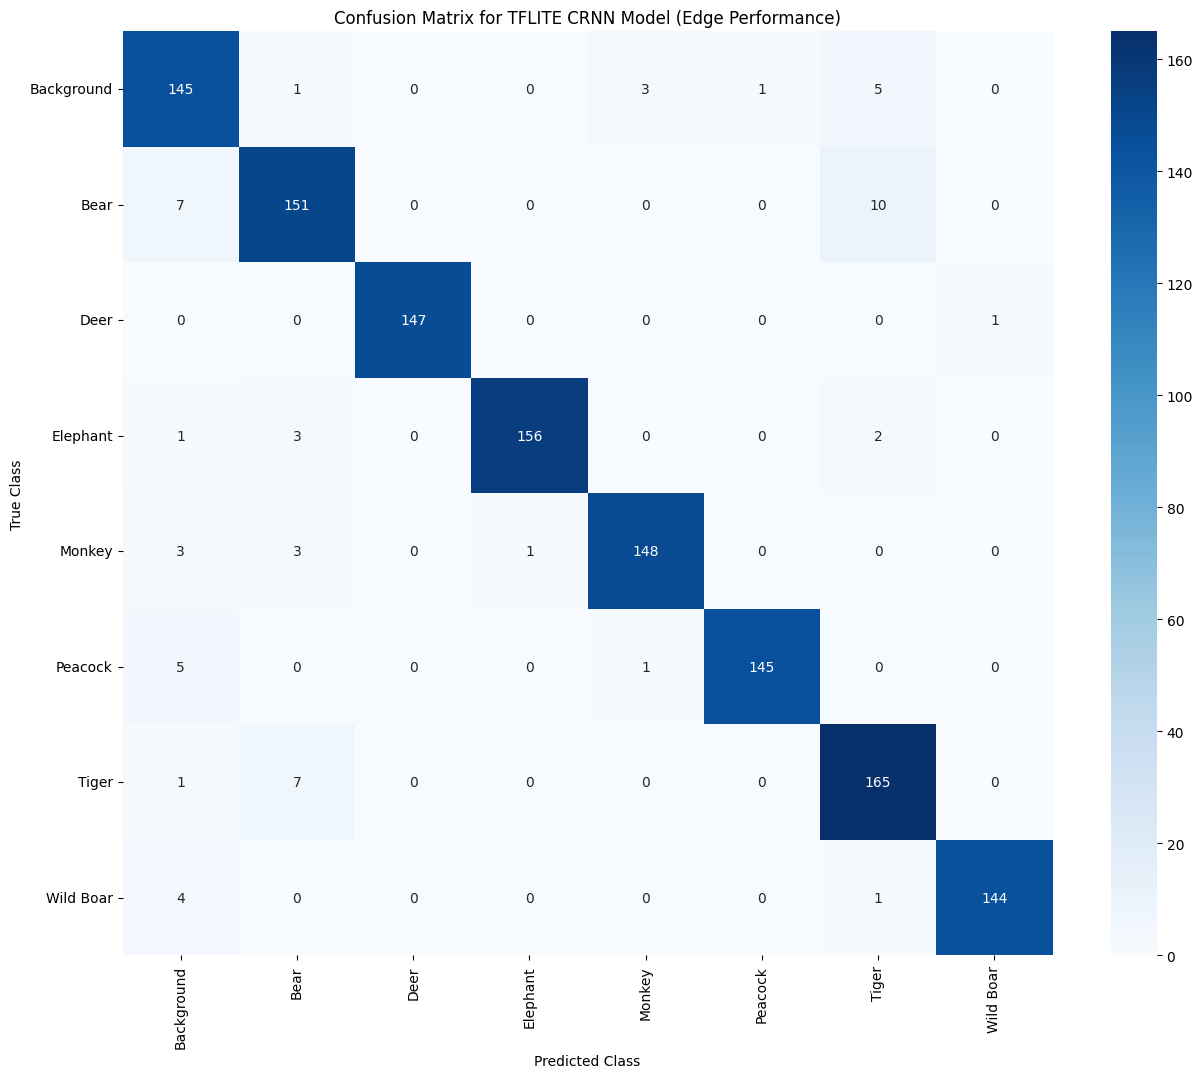


Confusion matrix image saved to: /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/confusion_matrix_tflite_quantized.png


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

# --- Configuration & Path Definitions (CRITICAL) ---

# This path MUST match where you saved your TFLite model file
TFLITE_MODEL_PATH = '/content/drive/MyDrive/Trained_Models/wildlife_crnn_quantized.tflite'
# This path is used for saving the output image (adjust if necessary)
BASE_MODELS_DIR = '/content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/'

# NOTE: X_test_crnn, y_test_one_hot, and class_names are assumed to be defined
# by the execution of the data splitting script provided previously.
# ----------------------------------------------------------------------


# --- 1. Load TFLite Model and Setup Interpreter ---

# Initialize the TFLite Interpreter
try:
    interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    print("TFLite Interpreter loaded successfully.")
except Exception as e:
    print(f"CRITICAL ERROR: Failed to load TFLite model. Please ensure the path is correct and the file exists. Error: {e}")
    exit()


# --- 2. Run Inference Sample by Sample ---

num_test_samples = X_test_crnn.shape[0]
num_classes = len(class_names)
tflite_predictions = np.zeros((num_test_samples, num_classes), dtype=np.float32)

print(f"\nStarting TFLite inference on {num_test_samples} test samples...")

for i in range(num_test_samples):
    # Get one sample and ensure it has the required batch size of 1
    input_data = X_test_crnn[i:i+1]

    # Set the input tensor
    # NOTE: If your TFLite model is quantized (INT8), you need to handle scaling here.
    # Assuming float32 input for simplicity unless the model explicitly requires int8.
    interpreter.set_tensor(input_details[0]['index'], input_data.astype(np.float32))

    # Run the inference
    interpreter.invoke()

    # Get the output probabilities
    output_data = interpreter.get_tensor(output_details[0]['index'])
    tflite_predictions[i] = output_data.squeeze()

print("TFLite inference complete.")


# --- 3. Generate Classification Metrics ---

# Convert predictions (probabilities) and true labels (one-hot) to integer indices
predicted_classes = np.argmax(tflite_predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)


# A. Classification Report
print("\n" + "="*70)
print("           TFLITE CLASSIFICATION REPORT (Quantized Performance)")
print("="*70)
# The target_names argument maps the integer indices back to your class names
print(classification_report(true_classes, predicted_classes, target_names=class_names))


# B. Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix for TFLITE CRNN Model (Edge Performance)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Save the matrix image
matrix_output_path = os.path.join(BASE_MODELS_DIR, 'confusion_matrix_tflite_quantized.png')
plt.savefig(matrix_output_path)
plt.show()

print(f"\nConfusion matrix image saved to: {matrix_output_path}")

TF to TFlite Converson

In [ ]:
import tensorflow as tf
import os

# 1. Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_71.h5')

# 2. Define the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 3. Apply Optimization (Quantization)
# This reduces model size and speeds up inference on integer-only processors (CPUs).
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Note: For best results, use Representative Dataset Quantization,
# but for simplicity, we start with default quantization.

# --- Fix for the ConverterError related to TensorList and dynamic shapes ---
# The error message suggests using SELECT_TF_OPS and disabling lower_tensor_list_ops
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Use TFLite built-in operations
    tf.lite.OpsSet.SELECT_TF_OPS     # Allow selecting TensorFlow operations
]
# Disable the experimental flag that causes issues with dynamic shapes in this case
converter._experimental_lower_tensor_list_ops = False
# --------------------------------------------------------------------------


# 4. Convert the model
tflite_model = converter.convert()

# 5. Save the TFLite model file
tflite_path = '/content/drive/MyDrive/Trained_Models/wildlife_crnn_quantized.tflite' # Added a filename
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model successfully converted and saved as: {tflite_path}")

Saved artifact at '/tmp/tmptu8cfc9a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 173, 40, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  136389521045840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389521043728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507842704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507851152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507852688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507852496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507850768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507851344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507851728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507849616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136389507851536:

Checking input type of TFlite model


In [ ]:
import tensorflow as tf

# Define the path to your TFLite model
TFLITE_MODEL_PATH = '/content/drive/MyDrive/Trained_Models/wildlife_crnn_quantized.tflite'

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()

# Check the data type of the input tensor
input_dtype = input_details[0]['dtype']

print(f"The TFLite model expects input of type: {input_dtype}")

# You can compare this to expected types like tf.float32 or tf.int8
if input_dtype == tf.float32:
    print("The model accepts float32 input.")
elif input_dtype == tf.int8:
    print("The model accepts int8 input.")
else:
    print(f"The model expects an unexpected input type: {input_dtype}")

The TFLite model expects input of type: <class 'numpy.float32'>
The model accepts float32 input.


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


new tflite solve the error

In [ ]:
import tensorflow as tf
import os

# --- PATHS ---
H5_MODEL_PATH = '/content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_71.h5'
NEW_TFLITE_PATH = '/content/drive/MyDrive/Trained_Models/wildlife_crnn_quantized(float32).tflite'
# ---

print(f"Loading Keras model from: {H5_MODEL_PATH}")

# 1. Load the model
model = tf.keras.models.load_model(H5_MODEL_PATH)

# 2. Define the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 3. Apply Optimization (Quantization)
# --- THIS LINE IS REMOVED TO FIX THE FLEX OP CONFLICT ---
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# ---

# 4. Fix for the ConverterError related to TensorList and dynamic shapes
# This part is CORRECT and NECESSARY
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Use TFLite built-in operations
    tf.lite.OpsSet.SELECT_TF_OPS     # Allow selecting TensorFlow operations
]
converter._experimental_lower_tensor_list_ops = False
# --------------------------------------------------------------------------

print("Converting model (float32) with Flex ops enabled...")

# 5. Convert the model
tflite_model = converter.convert()

# 6. Save the TFLite model file
with open(NEW_TFLITE_PATH, 'wb') as f:
    f.write(tflite_model)

print(f"Model successfully converted and saved as: {NEW_TFLITE_PATH}")

Loading Keras model from: /content/drive/MyDrive/Trained_Models/CRNN_Checkpoints/crnn_checkpoint_71.h5


Converting model (float32) with Flex ops enabled...
Saved artifact at '/tmp/tmpazzr__yt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 173, 40, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  133069595929168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595929936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595931472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595932240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595929552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595930896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595934160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069595934544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069563495824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133069563496208: TensorSpec(shape=